In [ ]:
# NLP Unit Operation 2; My name is 馬忻恩 and student number 11277603

In [2]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [20]:
sia.polarity_scores("""I like iPhones because of the app's quality and the screen's resolution.
However, I don't like iPhones because they are closed and expensive.""")

{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6124}

In [5]:
#匯入pandas 並且做 斷句 
#斷句：把一整串上下文不通順的句子拆解成"多個"各自有意義的句子

nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize

text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is   You shouldn't eat cardboard"""

tokenized_text=sent_tokenize(text)
print(tokenized_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', "The sky is   You shouldn't eat cardboard"]


In [6]:
#斷詞：把句子(不論多長)切成最小的單元(單元是：字)

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'You', 'should', "n't", 'eat', 'cardboard']


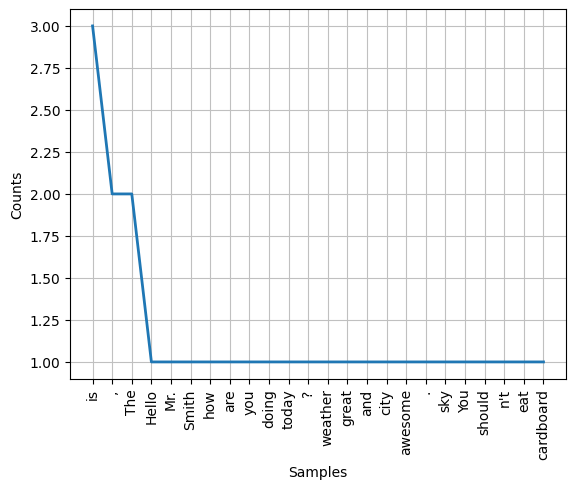

In [26]:
#呈現字頻：從上述的句子當中，統計每個字出現的次數，並繪出結果
#前三名分別是：(一)、is；(二)、,；(三)、The

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


In [7]:
#使用stopwords的目的：把重要的字留下，把較無意義的字刪掉(例如：be動詞)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
        
#print ("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence",filtered_sent)

Filtered Sentence ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'You', "n't", 'eat', 'cardboard']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#使用stemming的目的：把詞性還原，可減少處理的文字量(例如：fishing -> fish；running -> run)

from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
print("Stemmed Sentence:", stemmed_words)

Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'you', "n't", 'eat', 'cardboard']


In [9]:
#做詞性標註，例如：名詞、動詞

nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(stemmed_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('hello', 'NN'),
 ('mr.', 'NN'),
 ('smith', 'NN'),
 (',', ','),
 ('today', 'NN'),
 ('?', '.'),
 ('the', 'DT'),
 ('weather', 'NN'),
 ('great', 'JJ'),
 (',', ','),
 ('citi', 'JJ'),
 ('awesom', 'NN'),
 ('.', '.'),
 ('the', 'DT'),
 ('sky', 'NN'),
 ('you', 'PRP'),
 ("n't", 'RB'),
 ('eat', 'VB'),
 ('cardboard', 'NN')]

In [15]:
# 從kaggle去做電影影評的情感分析
# 第一步：先取取檔案

import pandas as pd
data=pd.read_csv(r'1122_NLP/train.tsv', sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [16]:
# 從kaggle去做電影影評的情感分析
# 第二步：計算個別情感的數量
# 0,1: negative; 2: neutral; 3,4: positive

data.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

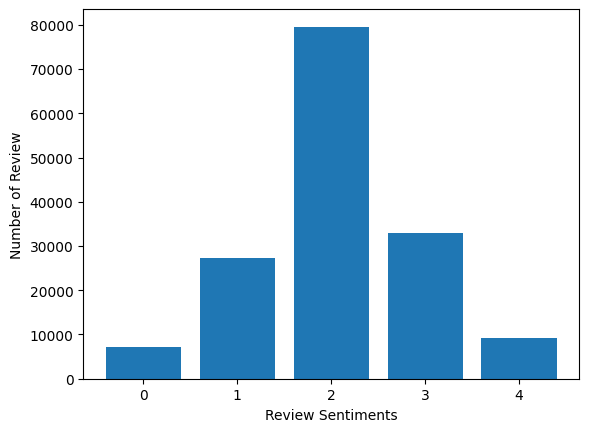

In [17]:
# 從kaggle去做電影影評的情感分析
# 第三步：呈現五種極性數量，並解釋可能極果
# 回答：2(neutral)最多，代表可能是一部一般的電影

import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show

In [23]:
# 從kaggle去做電影影評的情感分析
# 最終：利用Accuracy、F1來評估模型的效能
# 以下步驟包含：數據前處理、分割測試集、模型訓練、性能評估

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# 數據前處理：CountVectorizer 來轉換文本數據，將文本轉換為特徵向量
# RegexpTokenizer 被用來去除不必要的元素（如符號和數字），並僅提取文字
# Tokenizer is to remove unwanted elements from our data, like symbols and numbers
token = RegexpTokenizer(r'[a-zA-A0-9]+')
# ngram_range = (1, 1)
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['Phrase'])

# 分割測試集：train_test_split 將數據分為訓練集和測試集，比例為70%訓練數據和30%測試數據。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

# 模型訓練：MultinomialNB 訓練一個Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted=clf.predict(X_test)

# 性能評估：Accuracy、F1
print("The Multinomial_NB Accuracy by ngram_range = (1, 1):{:4f}".format(metrics.accuracy_score(y_test, predicted)))
print("The Multinomial_F1 by ngram_range = (1, 1):{:4f}".format(metrics.f1_score(y_test, predicted, average="macro")))


C:\Users\User\anaconda3\envs\1122_NLP\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The Multinomial_NB Accuracy by ngram_range = (1, 1):0.604917
The Multinomial_F1 by ngram_range = (1, 1):0.474335


In [24]:
# 從kaggle去做電影影評的情感分析
# 最終：利用Accuracy、F1來評估模型的效能
# 以下步驟包含：數據前處理、分割測試集、模型訓練、性能評估

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# 數據前處理：CountVectorizer 來轉換文本數據，將文本轉換為特徵向量
# RegexpTokenizer 被用來去除不必要的元素（如符號和數字），並僅提取文字
# Tokenizer is to remove unwanted elements from our data, like symbols and numbers
token = RegexpTokenizer(r'[a-zA-A0-9]+')
# ngram_range = (1, 10)
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,10), tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['Phrase'])

# 分割測試集：train_test_split 將數據分為訓練集和測試集，比例為70%訓練數據和30%測試數據。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

# 模型訓練：MultinomialNB 訓練一個Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted=clf.predict(X_test)

# 性能評估：Accuracy、F1
print("The Multinomial_NB Accuracy by ngram_range = (1, 10):{:4f}".format(metrics.accuracy_score(y_test, predicted)))
print("The Multinomial_F1 by ngram_range = (1, 10):{:4f}".format(metrics.f1_score(y_test, predicted, average="macro")))


C:\Users\User\anaconda3\envs\1122_NLP\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The Multinomial_NB Accuracy by ngram_range = (1, 10):0.621107
The Multinomial_F1 by ngram_range = (1, 10):0.516738
